# Pre requisites

Install and import required packages

In [ ]:
!pip3 install boto3
!pip3 install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.8 MB/s eta 0:00:00


In [ ]:
import boto3
from pathlib import Path
from botocore import UNSIGNED
from botocore.client import Config
from tqdm.notebook import tqdm

# Download files from s3 bucket

Get a list of all files in the bucket and download into respective folders within the colab runtime

In [ ]:
def get_file_folders(s3_client, bucket_name, prefix=""):
    file_names = []
    folders = []

    default_kwargs = {
        "Bucket": bucket_name,
        "Prefix": prefix
    }
    next_token = ""

    while next_token is not None:
        updated_kwargs = default_kwargs.copy()
        if next_token != "":
            updated_kwargs["ContinuationToken"] = next_token

        response = s3_client.list_objects_v2(**updated_kwargs)
        contents = response.get("Contents")

        for result in contents:
            key = result.get("Key")
            if key[-1] == "/":
                folders.append(key)
            else:
                file_names.append(key)

        next_token = response.get("NextContinuationToken")

    return file_names, folders

In [ ]:
def download_files(s3_client, bucket_name, local_path, file_names, folders):
    local_path = Path(local_path)

    for folder in tqdm(folders):
        folder_path = Path.joinpath(local_path, folder)
				# Create all folders in the path
        folder_path.mkdir(parents=True, exist_ok=True)

    for file_name in tqdm(file_names):
        file_path = Path.joinpath(local_path, file_name)
				# Create folder for parent directory
        file_path.parent.mkdir(parents=True, exist_ok=True)
        s3_client.download_file(
            bucket_name,
            file_name,
            str(file_path)
        )

In [ ]:
client = boto3.client('s3', config=Config(signature_version=UNSIGNED))
file_names, folders = get_file_folders(client, 'eyes-on-the-ground')

In [ ]:
download_files(
        client,
        "eyes-on-the-ground",
        "/content",
        file_names,
        folders
    )

0it [00:00, ?it/s]

  0%|          | 0/34733 [00:00<?, ?it/s]

# Archive the images to download from Colab

## Create zip archive of images

In [ ]:
from zipfile import ZipFile
import os

def get_all_file_paths(directory):

    # initializing empty file paths list
    file_paths = []

    # crawling through directory and subdirectories
    for root, directories, files in os.walk(directory):
        for filename in files:
            # join the two strings in order to form the full filepath.
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)

    # returning all file paths
    return file_paths

def create_zip_file(directory, zip_path):
    # calling function to get all file paths in the directory
    file_paths = get_all_file_paths(directory)

    # printing the list of all files to be zipped
    print('Following files will be zipped:')
    for file_name in file_paths:
        print(file_name)

    # writing files to a zipfile
    with ZipFile(zip_path,'w') as zip:
        # writing each file one by one
        for path in file_paths:
            arcname = path.split('/')[-1]
            zip.write(path, arcname)

    print('All files zipped successfully!')


In [ ]:
zip_names = ['/content/train.zip', '/content/test.zip']

folders = ['/content/train', '/content/test']
for zip_name,folder in zip(zip_names, folders):
    create_zip_file(folder, zip_name)

Se han truncado las últimas 5000 líneas del flujo de salida.
/content/test/L378F02829C01S07388Rp22771.jpg
/content/test/L342F02128C39S14046Rp34421.jpg
/content/test/L144F01733C01S07575Rp29052.jpg
/content/test/L398F00102C01S06805Rp25888.jpg
/content/test/L141F00095C39S12509Rp35516.jpg
/content/test/L321F03728C01S05641Rp09195.jpg
/content/test/L1116F01189C39S12229Rp32702.jpg
/content/test/L1133F03125C01S07879Rp22594.jpg
/content/test/21_repeat_2_1355_5354_3724.JPG
/content/test/L243F04628C40S13174Rp48693.jpg
/content/test/L429F03494C39S15004Rp48680.jpg
/content/test/L331F04163C01S06842Rp19827.jpg
/content/test/L144F02681C39S13948Rp43864.jpg
/content/test/L134F00762C39S14425Rp47323.jpg
/content/test/L1093F00983C01S08066Rp28915.jpg
/content/test/L355F02271C01S08917Rp30559.jpg
/content/test/L371F00958C39S12875Rp40099.jpg
/content/test/L326F00156C01S00050Rp13194.jpg
/content/test/11_repeat_2_2416_5338_3703.JPG
/content/test/L406F04369C01S07190Rp21588.jpg
/content/test/L134F00839C39S14204Rp4

## Download data to local storage

Save zipped images and metadata to downloads folder on local machine

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil

dest = '/content/drive/My Drive/Proyecto 2 - Data Science/'

data_files = [
    '/content/README.md',
    '/content/train.csv',
    '/content/train.zip',
    '/content/test.zip'
]

os.makedirs(dest, exist_ok=True)

for file_path in data_files:
    shutil.copy(file_path, dest)


In [13]:
import os
import pandas as pd

drive_path = '/content/drive/Shared drives/Data Science Proyecto 2/DataSets/'

df = pd.read_csv( drive_path + 'train.csv')
df.head()


,filename,growth_stage,damage,extent,season
0,L398F01276C01S07896Rp26856.jpg,F,DR,0,LR2021
1,L355F02268C02S08916Rp30595.jpg,F,DR,0,LR2021
2,L134F00879C39S14248Rp42482.jpg,F,DR,10,SR2021
3,L1095F01359C01S08260Rp24587.jpg,F,DR,10,LR2021
4,L134F00777C39S14171Rp45993.jpg,F,DR,10,SR2021


In [14]:
df['extent'] = df['extent'].astype(int) /100
df

,filename,growth_stage,damage,extent,season
0,L398F01276C01S07896Rp26856.jpg,F,DR,0.0,LR2021
1,L355F02268C02S08916Rp30595.jpg,F,DR,0.0,LR2021
2,L134F00879C39S14248Rp42482.jpg,F,DR,0.1,SR2021
3,L1095F01359C01S08260Rp24587.jpg,F,DR,0.1,LR2021
4,L134F00777C39S14171Rp45993.jpg,F,DR,0.1,SR2021
...,...,...,...,...,...
26101,L354F03913C01S09853Rp22354.jpg,V,WN,0.2,LR2021
26102,L371F00110C01S06849Rp17916.jpg,V,WN,0.2,LR2021
26103,L1115F00437C39S12162Rp34884.jpg,V,WN,0.2,SR2021
26104,L1136F03296C01S09382Rp19244.jpg,V,WN,0.2,LR2021


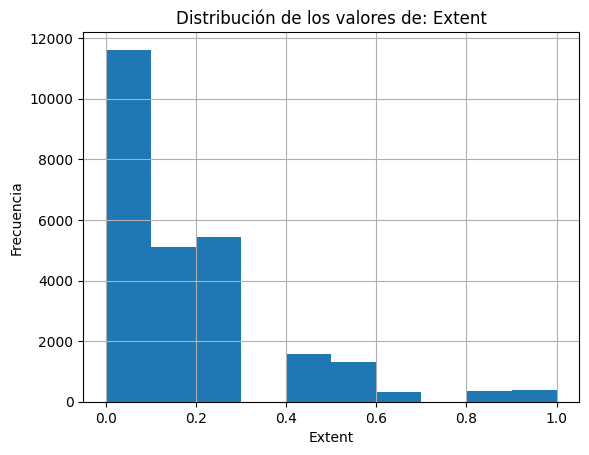

In [15]:
import matplotlib.pyplot as plt

df['extent'].hist()
plt.title('Distribución de los valores de: Extent')
plt.xlabel('Extent')
plt.ylabel('Frecuencia')
plt.show()
